### initial check

In [1]:
import os
import numpy as np
import pandas as pd
import funpack
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fp_dir = os.path.dirname(funpack.__file__)
print(fp_dir)

/home/fs0/syzhang/.conda/envs/biobank/lib/python3.9/site-packages/funpack


In [3]:
cfg_dir = os.path.join(fp_dir, 'configs', 'fmrib')

for f in os.listdir(cfg_dir):
    print(f)

datetime_formatting.tsv
variables_clean.tsv
processing.tsv
categories.tsv
variables_parentvalues.tsv
datacodings_navalues.tsv
datacodings_recoding.tsv


In [4]:
df = pd.read_csv(os.path.join(cfg_dir, 'categories.tsv'), '\t')

In [5]:
df.shape

(24, 3)

In [6]:
df

,ID,Category,Variables
0,1,"age, sex, brain MRI protocol, Phase","31,34,21022,22200,25780"
1,2,genetics,"21000,22000:22125,22201:22325,22182,22800:22823"
2,3,early life factors,"52,129,130,1677,1687,1697,1737,1767,1777,1787,..."
3,10,lifestyle and environment - general,"3:6,132,189,670,680,699,709,728,738,767,777,10..."
4,11,lifestyle and environment - exercise and work,"1001,1011,796,806,816,826,845,864,874,884,894,..."
5,12,lifestyle and environment - food and drink,"1289:10:1389,1408:10:1548,2654,3089,3680,6144,..."
6,13,lifestyle and environment - alcohol,"1558:10:1628,2664,3731,3859,4407,4418,4429,444..."
7,14,lifestyle and environment - tobacco,"1239:10:1279,2644,2867:10:2907,2926,2936,3159,..."
8,20,physical measures - general,"46:51,1707,1717,1727,1747,1757,2306,3059,3062:..."
9,21,physical measures - bone density and sizes,"77,78,3083:3086,3143:3144,3146:3148,4092,4095,..."


In [34]:
dfp = pd.read_csv(os.path.join(cfg_dir, 'datacodings_navalues.tsv'), sep='\t')

In [37]:
dfp

,ID,NAValues
0,13,"-1,-3"
1,14,"-1,-3"
2,37,"-1,-3"
3,90,-3
4,101,-1
...,...,...
179,100690,-3
180,100691,-3
181,100692,-3
182,100698,-313


#### testing subj data

* 0 - initial assessment visit (2006-10), recruited and consent, 8840 people
* 1 - first repeat assessment visit (2012-13), 218 people
* 2 - imaging visit (2014+), 462 people
* 3 - first repeat imaging visit (2019+) 

In [2]:
tsv_cond = os.path.join('..', 'funpack_cfg', 'subj_with_condition_with_clinical_variables.tsv')

In [3]:
df_cond = pd.read_csv(tsv_cond, sep='\t')

/home/fs0/syzhang/.conda/envs/biobank/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2446,2447,2448,2449,2450,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2500,2501,2502,2503,2504,2505,2506,2507,2508,2558,2559,2560,2561,2562,2563,2564,2565,2566,2567,2568,2569,2570,2571,2572,2573,2574,2575,2576,2577,2578,2579,2580,2581,2582,2583,2584,2585,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,2622,2623,2624,2625,2626,2627,2628,2739,2740,2741,2742,2743,2744,2745,2746,2747,2748,2749,2750,2751,2818,2819,2820,2821,2822,2823,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833,2834,2835,2836,2837,2838,2839,2840,2841,2842,2843,2844,2845,2846,2847,2848,2849,2850,2851,2852,2853,2854,2855,2856,2857,2858,2859,2860,2861,2862,2863,2864,2865,2866,2867,2868,2869,2870,2871,2872,2873,2874,2875,2876,2877,2878,2879,28

In [4]:
df_cond.shape

(8331, 3794)

In [5]:
df_cond.head()

,eid,6159-0.0,6159-0.1,6159-0.2,6159-0.3,6159-0.4,6159-0.5,6159-0.6,6159-1.0,6159-1.1,...,20155-0.21,20155-0.22,20155-0.23,20155-0.24,20155-0.25,20156-0.0,20157-0.0,20246-0.0,20247-0.0,20248-0.0
0,1000149,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN
1,1001225,3.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1001416,-7.0,NaN,NaN,NaN,NaN,NaN,NaN,-7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1002910,1.0,4.0,5.0,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1003609,-7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
cols = df_cond.columns

In [6]:
all_vars = []
for c in cols:
    all_vars.append(c.split('-')[0])

In [7]:
unique_vars = np.unique(all_vars)

In [8]:
len(unique_vars)

1022

In [85]:
pain_types = {
    'back pain': 3571, 
    'facial pain': 4067,
    'general pain': 2956,
    'headache': 3799,
    'hip pain': 3414,
    'knee pain': 3773,
    'neck/shoulder pain': 3404,
    'stomach pain': 3741
}

In [10]:
pain_types.values()

dict_values([3571, 4067, 2956, 3799, 3414, 3773, 3404, 3741])

In [86]:
def extract_pain(df, pain_code, visit=None):
    """extract pain type into df"""
    # slice columns
    if type(pain_code) is list:
        p_cols = []
        for code in pain_code:
            p_cols += [col for col in df.columns if str(code) in col]
    else:
        p_cols = [col for col in df.columns if str(pain_code) in col]
    # slice particular visit
    if visit is not None:
        p_cols = [col for col in p_cols if '-'+str(visit) in col]
    # extract pain df
    df_pain = pd.concat([df_cond['eid'], df[p_cols]], axis=1)
    df_pain.set_index('eid', inplace=True)
    # replace nans
    df_pain.replace([-1.,-3.], np.nan, inplace=True)
    return df_pain

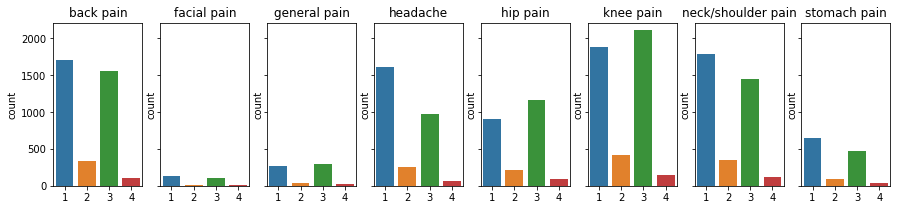

In [130]:
# check data count
f, axes = plt.subplots(1,len(pain_types), figsize=(15, 3), sharey=True)
c = 0
for k, v in pain_types.items():
    df_tmp = extract_pain(df_cond, v)
    df_tmp.replace(0.0, np.nan, inplace=True) # keep pain only
    g = sns.countplot(data=df_tmp, ax=axes[c])
    axes[c].set_title(k)
    axes[c].set_xticklabels(['1','2','3','4'])
    c += 1

In [132]:
# check data count
tt = 0
for k, v in pain_types.items():
    df_tmp = extract_pain(df_cond, v)
    df_tmp.replace(0.0, np.nan, inplace=True) # keep pain only
    df_tmp.dropna(inplace=True)
    print(k, df_tmp.shape[0])
    tt += df_tmp.shape[0]
print(tt)

back pain 4
facial pain 0
general pain 1
headache 8
hip pain 0
knee pain 3
neck/shoulder pain 5
stomach pain 0
21


In [136]:
# check data count
tt = 0
for k, v in pain_types.items():
    df_tmp = extract_pain(df_cond, v)
    df_tmp.replace(0.0, np.nan, inplace=True) # keep pain only
    df_tmp.dropna(inplace=True, subset=[df_tmp.columns[0]])
    print(k, df_tmp.shape[0])
    tt += df_tmp.shape[0]
print(tt)

back pain 1708
facial pain 139
general pain 268
headache 1608
hip pain 908
knee pain 1878
neck/shoulder pain 1786
stomach pain 643
8938


In [156]:
# check people with multiple pain
df_tmp = extract_pain(df_cond, list(pain_types.values()), visit=1)
df_tmp.shape

(8331, 8)

In [161]:
# multiple pain subjects
mp_sj = []
for i, row in df_tmp.iterrows():
    if np.nansum(row.values)>2:
        mp_sj.append(i)

In [162]:
len(mp_sj)

190

In [187]:
# check people more than 1 observations
slice1 = 0
slice2 = 2
cc = 0
for k, v in pain_types.items():
    df1 = extract_pain(df_cond, v, visit=slice1)
    df3 = extract_pain(df_cond, v, visit=slice2)
    df1.replace(0.0, np.nan, inplace=True) # keep pain only
    df3.replace(0.0, np.nan, inplace=True) # keep pain only

    same_idx = df1.values==df3.values
    print(k, df1[same_idx].shape[0])
    cc += df1[same_idx].shape[0]
print(cc)

back pain 753
facial pain 31
general pain 79
headache 644
hip pain 354
knee pain 926
neck/shoulder pain 654
stomach pain 163
3604


In [164]:
# check people with multiple pain
df2 = extract_pain(df_cond, list(pain_types.values()), visit=2)
df2.shape

(8331, 8)

#### check disease 

In [104]:
def extract_disease(df, disease_code, visit=None):
    """extract disease type into df"""
    # slice reported disease
    df_d = df[[col for col in df.columns if str(20002) in col]]
    df_d = pd.concat([df['eid'], df_d], axis=1)
    # slice particular visit
    df_dvd = pd.DataFrame()
    df_dvd['eid'] = df_d['eid']
    if visit is not None:
        for visit in range(4):
            p_cols = [col for col in df_d.columns if '-'+str(visit) in col]
            # extract visit df
            df_dv = pd.concat([df_d['eid'], df_d[p_cols]], axis=1)
            df_dv.set_index('eid', inplace=True)
            # find matching disease
            disease_tag = []
            for i, r in df_dv.iterrows():
                if float(disease_code) in r.values:
                    disease_tag.append(1)
                else:
                    disease_tag.append(0)
            df_dvd[str(disease_code)+'-'+str(visit)] = disease_tag
        df_dvd.set_index('eid', inplace=True)

    return df_dvd

In [147]:
dfd = extract_disease(df_cond, 1065, visit=0)

In [148]:
dfd.shape

(8331, 4)

In [149]:
dfd.columns

Index(['1065-0', '1065-1', '1065-2', '1065-3'], dtype='object')

In [96]:
df_disease = pd.read_csv('./bbk_codes/disease_code.csv' )

In [151]:
df_disease

,disease,code
0,irritable bowel syndrome,1154
1,migraine,1265
2,headaches (not migraine),1436
3,back problem,1294
4,cervical spondylosis,1478
5,spine arthritis/spondylitis,1311
6,prolapsed disc/slipped disc,1312
7,disc problem,1532
8,disc degeneration,1533
9,back pain,1534


(8331, 4)
(8331, 4)
(8331, 4)
(8331, 4)
(8331, 4)
(8331, 4)
(8331, 4)
(8331, 4)
(8331, 4)
(8331, 4)
(8331, 4)
(8331, 4)
(8331, 4)
(8331, 4)
(8331, 4)
(8331, 4)
(8331, 4)
(8331, 4)
(8331, 4)
(8331, 4)


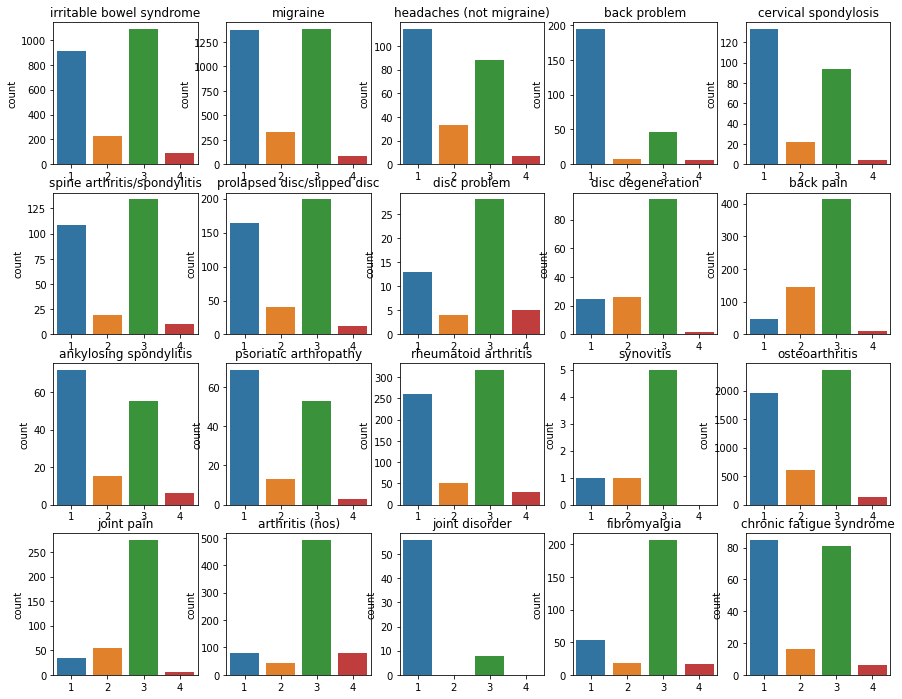

In [156]:
# check data count
f, axes = plt.subplots(4,int(df_disease.shape[0]/4), figsize=(15, 12))#, sharey=True)
c = 0

for i, r in df_disease.iterrows():
    df_tmp = extract_disease(df_cond, r['code'], visit=[0,1,2,3])
    print(df_tmp.shape)
    df_tmp.replace(0.0, np.nan, inplace=True) # keep pain only
    g = sns.countplot(data=df_tmp, ax=axes.flat[c])
    axes.flat[c].set_title(r['disease'])
    axes.flat[c].set_xticklabels(['1','2','3','4'])
    c += 1

#### check digestive health date vs imaging date

In [106]:
# check image condition
df_d = df_cond[['53-2.0','21023-0.0']]
df_d = pd.concat([df_cond['eid'], df_d], axis=1)
df_d.set_index('eid', inplace=True)
# remove na
df_d.dropna(inplace=True)
# rename cols
df_d.rename(columns={'53-2.0':'imaging_date', '21023-0.0':'digest_date'}, inplace=True)

In [108]:
# to dt
df_dt = pd.to_datetime(df_d['digest_date'])
df_it = pd.to_datetime(df_d['imaging_date'])
# calcualte diff
diff = (df_dt-df_it).values
dff = diff.astype('int64')

In [109]:
# those finished digestive after imaging
sum(dff>0)/len(dff)

0.3967889908256881

In [110]:
len(dff)

6540

In [111]:
sum(dff>0)

2595

In [112]:
df_qualify = df_d.iloc[dff>0]

#### check how many qualified have pain

In [89]:
df_conds = df_cond.set_index('eid')

In [91]:
df_conds.shape

(8331, 3793)

In [92]:
dfq = df_conds[df_conds.index.isin(df_qualify.index)]

In [101]:
dfq['eid'] = dfq.index.values

<ipython-input-101-947c8bc6c436>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfq['eid'] = dfq.index.values


In [102]:
dfq.shape

(2595, 3794)

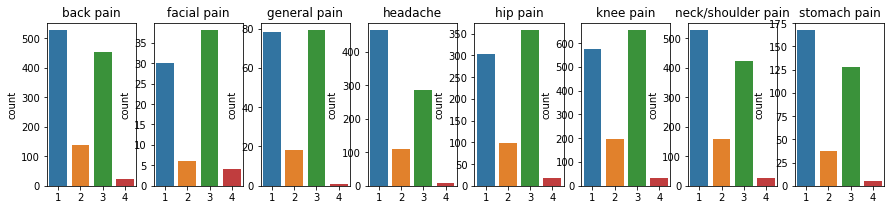

In [103]:
# check data count
f, axes = plt.subplots(1,len(pain_types), figsize=(15, 3))
c = 0
for k, v in pain_types.items():
    df_tmp = extract_pain(dfq, v)
    df_tmp.replace(0.0, np.nan, inplace=True) # keep pain only
    g = sns.countplot(data=df_tmp, ax=axes[c])
    axes[c].set_title(k)
    axes[c].set_xticklabels(['1','2','3','4'])
    c += 1

(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)
(2595, 4)


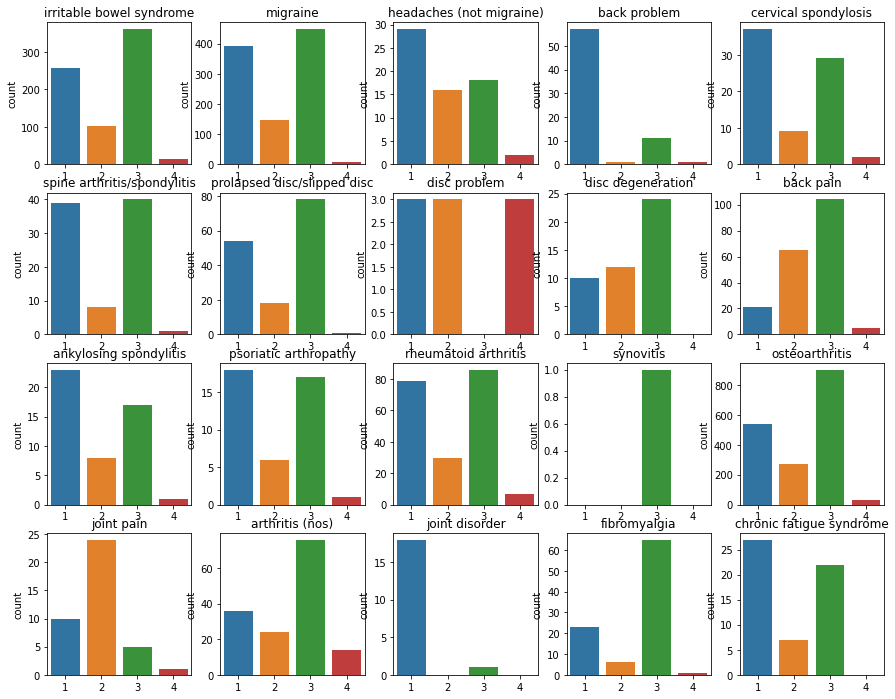

In [105]:
# check data count
f, axes = plt.subplots(4,int(df_disease.shape[0]/4), figsize=(15, 12))#, sharey=True)
c = 0

for i, r in df_disease.iterrows():
    df_tmp = extract_disease(dfq, r['code'], visit=[0,1,2,3])
    print(df_tmp.shape)
    df_tmp.replace(0.0, np.nan, inplace=True) # keep pain only
    g = sns.countplot(data=df_tmp, ax=axes.flat[c])
    axes.flat[c].set_title(r['disease'])
    axes.flat[c].set_xticklabels(['1','2','3','4'])
    c += 1

In [ ]:
dfq

#### check without conditions

In [114]:
tsv_nocond = os.path.join('..', 'funpack_cfg', 'subj_withOUT_condition_with_clinical_variables.tsv')

df_nocond = pd.read_csv(tsv_nocond, sep='\t')

df_nocond.shape

/home/fs0/syzhang/.conda/envs/biobank/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2439,2440,2441,2442,2443,2444,2445,2446,2447,2448,2449,2450,2451,2452,2453,2454,2455,2456,2499,2500,2501,2502,2503,2504,2505,2506,2542,2543,2544,2545,2546,2547,2548,2549,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559,2560,2561,2562,2563,2564,2565,2566,2567,2568,2569,2570,2571,2572,2573,2574,2575,2576,2577,2578,2579,2580,2581,2582,2583,2584,2585,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600,2601,2602,2603,2604,2605,2606,2739,2740,2741,2742,2743,2744,2745,2746,2747,2748,2749,2750,2802,2803,2804,2805,2806,2807,2808,2809,2810,2811,2812,2813,2814,2815,2816,2817,2818,2819,2820,2821,2822,2823,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833,2834,2835,2836,2837,2838,2839,2840,2841,2842,2843,2844,2845,2846,2847,2848,2849,2850,2851,2852,2853,2854,2855,2856,2857,2858,2859,2860,2861,2862,2863,2864,2865,2866,3001,3002,3003,3004,3005,3006,30

(14659, 3794)

In [121]:
# check image condition
df_d = df_nocond[['53-2.0','21023-0.0']]
df_d = pd.concat([df_nocond['eid'], df_d], axis=1)
df_d.set_index('eid', inplace=True)
# remove na
df_d.dropna(inplace=True)
# rename cols
df_d.rename(columns={'53-2.0':'imaging_date', '21023-0.0':'digest_date'}, inplace=True)

In [122]:
df_d.shape

(11541, 2)

In [123]:
# to dt
df_dt = pd.to_datetime(df_d['digest_date'])
df_it = pd.to_datetime(df_d['imaging_date'])
# calcualte diff
diff = (df_dt-df_it).values
dff = diff.astype('int64')

In [124]:
# those finished digestive after imaging
sum(dff>0)/len(dff)

0.3423446841694827

In [125]:
df_qualify = df_d.iloc[dff>0]

In [126]:
df_qualify

,imaging_date,digest_date
eid,,
1001143,2016-01-30,2017-04-26T14:33:16
1002039,2015-05-08,2017-04-19T09:00:40
1002393,2016-10-05,2017-05-04T20:10:11
1002884,2015-09-23,2017-04-21T18:38:44
1003045,2016-11-28,2017-05-12T16:07:00
...,...,...
6020171,2016-12-10,2017-05-02T18:50:46
6020209,2015-12-06,2017-04-25T17:32:23
6022107,2015-04-20,2017-05-01T20:55:05


In [128]:
df_noconds = df_nocond.set_index('eid')

In [129]:
dfq = df_noconds[df_noconds.index.isin(df_qualify.index)]

In [130]:
dfq.shape

(3951, 3793)

In [131]:
# people who has pain in digestive q but no pain
p_cols = [col for col in dfq.columns if str(21027) in col]

In [132]:
dfq[p_cols]

,21027-0.0
eid,
1001143,NaN
1002039,0.0
1002393,1.0
1002884,1.0
1003045,NaN
...,...
6020171,NaN
6020209,NaN
6022107,NaN
